In [1]:
%%HTML
<link rel="stylesheet" type="text/css" href="../css/custom.css">

# Keras Basics

![footer_logo](../images/logo.png)

## Goal
The goal of this notebook is to familiarize yourself with the Keras sequential API and build your first feed forward neural network. 

## Program

We first discuss the Keras library, provide an example of a basic workflow and take a look at what layers and optimizers are available from the library.

- [The Keras library]()
- [A basic example]()
- [Keras layers and optimizers]()

Aftewards we will build a Keras model, train it on a dataset and evaluate the predictions.

- [Building a model]()
- [Training and evaluating]()

We will then build and train deeper models that contain more layers.

- [The explicit creation of layers]()
- [Training deeper models]()
    - [<mark> Exercise]()

In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = 15, 6

---
## The Keras Library

Keras is a high-level Python API for neural networks run on TensorFlow by Google. It was developed with a focus on enabling fast experimentation and runs seamlessly on CPU and GPU. 

The core data structures of Keras are **layers** and **models**. There are three ways of constructing the model: the [sequential API](https://keras.io/getting-started/sequential-model-guide/), the [functional API](https://keras.io/getting-started/functional-api-guide/) or by [subclassing](https://keras.io/models/about-keras-models/) a keras class. In this notebook, we will focus on the `Sequential` model -- a linear stack of layers.

There are many different layers that can be added to the model, including but not limited to Dropout and Dense. The biggest challenge for beginners is to determine which type of layers to use in your model and with what hyperparametes (e.g. number of neurons for your fully-connected Dense layer, or the keep probability of your Dropout layer). This is a topic that we will cover later; for this notebook, the focus is familiarising yourself with the Keras API. 

Once your model is constructed with all the layers in place, you can compile, train and evaluate it. This is the time to decide your model's hyperparameters, such as the correct loss, optimizer and number of epochs to train for. 

## Example of a basic workflow

For our basic example, we first generate some random data and then experience the process of creating, defining, compiling, training and evaluating the model. 

Here's an example of the flow:

```python
# Define the model.
model = Sequential()

# Add layers.
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile by setting the loss, optimizer and metrics to report.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Start training.
model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)

# Evaluate.
score = model.evaluate(x_test, y_test, batch_size=128)
```

## Keras layers and optimizers

Before we dive into creating our model, let's have a look at what's available. 
Let's start with our imports and look what layers and optimizers are available: 

Import `Sequential` model API class:

In [4]:
from tensorflow.keras.models import Sequential

Import predefined `layers` module and see what's available:

In [5]:
from tensorflow.keras import layers

[layer for layer in dir(layers) if not layer.startswith("_")]

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'CategoryEncoding',
 'CenterCrop',
 'Concatenate',
 'Conv1D',
 'Conv1DTranspose',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM1D',
 'ConvLSTM2D',
 'ConvLSTM3D',
 'Convolution1D',
 'Convolution1DTranspose',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv1D',
 'DepthwiseConv2D',
 'Discretization',
 'Dot',
 'Dropout',
 'ELU',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPool3D',
 'GlobalM

Do the same for the `optimizers` module:

In [6]:
from tensorflow.keras import optimizers

[opt for opt in dir(optimizers) if not opt.startswith("_")]

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'Ftrl',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 'deserialize',
 'get',
 'schedules',
 'serialize']

There are many layers and optimizers to choose from! 

---
## Building a  model

![simple nn](../images/neural_networks_in_practice/model_diagram.gif)

We'll build a simple model with the architecture given in the figure above.
The input $\mathbf{X}$ consists of two variables $\mathbf{x}_1$ and $\mathbf{x}_2$ and we'll try to predict a binary class $\mathbf{y}$.

Create a model with the sequential API. `model` is the container for your network architecture.

In [7]:
model = Sequential(name="DummyModel")

Defining a model is as easy as adding a layer through the `.add()` method. The layers we add are imported from `keras.layers`. In this case, we create a simple neural network of `Dense` layers (fully-connected layer) and dropout. However, other layer types can be imported and added to our model with the `.add()` method as well. 

In [8]:
help(model.add)

Help on method add in module keras.engine.sequential:

add(layer) method of keras.engine.sequential.Sequential instance
    Adds a layer instance on top of the layer stack.
    
    Args:
        layer: layer instance.
    
    Raises:
        TypeError: If `layer` is not a layer instance.
        ValueError: In case the `layer` argument does not
            know its input shape.
        ValueError: In case the `layer` argument has
            multiple output tensors, or is already connected
            somewhere else (forbidden in `Sequential` models).



For each layer you can define the parameters of it.

For example, the `Dense()` layer has number of units, its activation function, name, etc.

In [9]:
from tensorflow.keras.layers import Dense

In [13]:
# help(Dense)

Try to create the first hidden layer of 3 units with ReLU activation that expects the input to have a dimensionality of 2:

In [11]:
model.add(
    Dense(name="FullyConnected_1", units=3, activation="relu", input_dim=2, use_bias=True)
)

Let's see the structure of the model:

In [12]:
model.summary()

Model: "DummyModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FullyConnected_1 (Dense)    (None, 3)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


## <mark>Questions: 
> - Why are there 9 parameters?
> - Which other activations could you use? Check out the [list of activations](https://keras.io/activations/).

Now we can add the next hidden layer of 2 units

In [ ]:
model.add(Dense(name="FullyConnected_2", units=2, activation="relu"))
model.summary()

Add the output layer of a single unit and use a `sigmoid` activation function:

In [ ]:
model.add(
    Dense(name="FullyConnected_OutputLayer", units=1, activation="sigmoid")
)
model.summary()

Models have to be compiled before training, we need to add:

- optimizer
- loss function
- metrics

The optimizer is the algorithm that performs gradient descent.
We'll use adam.
                
The loss function defines the goal of our model.
In this case it's binary classification, and the binary crossentropy is the appropriate loss function fot that.

The metric(s) set are used to evaluate over the test dataset
In addition, a validation test will be performed over each epoch if we define `validation_split` at trainining time.
This is very helpful to asses the health of our model (overfitting for example).

In [ ]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

## <mark> Questions:
>
> - Which other optimizers are available? Check the [list of optimizers](https://keras.io/optimizers/)
> - How many losses are there avilable? Check the [list of loss functions](https://keras.io/losses/)
> - What other metrics? [List of metrics](https://keras.io/metrics/)

What have we done so far?
We have defined the architecture of our model and put that in a variable `model`.
This model is a blank slate as it hasn't learned anything yet, so let's find some data to train!

### Our model is ready to be trained but where is the data?

Normally you would look at the data first before creating the model:

In [22]:
moons = pd.read_csv("../data/moons.csv")
print("(rows, columns):", moons.shape)
moons.sample(3)

(rows, columns): (1000, 3)


,x1,x2,y
370,1.303199,-0.282700,1
116,2.050108,0.319231,1
662,-0.604328,0.768721,0


The data consists of two coordinates (`x1`, `x2`) describing locations of a point and a class (`y`).
The data is not linearly separable:

<AxesSubplot:xlabel='x1', ylabel='x2'>

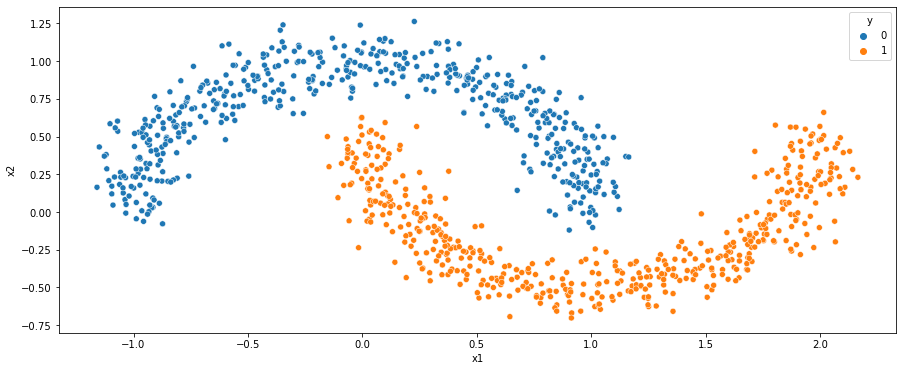

In [23]:
sns.scatterplot(data=moons, x="x1", y="x2", hue="y")

Separate the data in two sets, one for training and one for testing:

In [24]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(
    moons[["x1", "x2"]], moons["y"], test_size=0.1, random_state=21
)

## Training & Evaluating

Time to fit the model on the data and see how it performs:

In [ ]:
# Fit the parameters. 
model.fit(
    X_train,
    y_train,
    batch_size=900,
    epochs=3
)

# Evaluate the model. 
score = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Plot the results.
test_pred = X_test.assign(y_pred=y_pred.squeeze())
fig, ax = plt.subplots()
sns.scatterplot(x="x1", y="x2", hue="y_pred", data=test_pred, ax=ax)
ax.set_title("Predictions on test set");

---
## Intermezzo: Explicit creation of layers

The model we created looks like:

```python
model = Sequential()
model.add(Dense(name="FullyConnected_1", units=3, activation="relu", input_dim=2))
model.add(Dense(name="FullyConnected_2", units=2, activation="relu"))
model.add(Dense(name="FullyConnected_OutputLayer", units=1, activation="sigmoid"))
model.summary()
```

We could have defined explicitly each of the components:

```python
model = Sequential()

# input layer transformations (none in this case)

# 1st hidden layer
model.add(Dense(name="HiddenLayer_1", units=3, input_dim=2))
model.add(Activation(name="ReLu_1", activation="relu"))

# 2nd hidden layer
model.add(Dense(name="HiddenLayer_2", units=2))
model.add(Activation(name="ReLu_2", activation="relu"))

# output layer
model.add(Dense(name="OutputLayer", units=1))
model.add(Activation(name="Sigmoid_3", activation="sigmoid"))

model.summary()
```


This explicit creation of every component gives flexibility on the layer order when customizing a deep neural network.

## Training deeper models

In the cell below we've wrapped the model definition in a small function so we can quickly re-create models.
We'll use this more often in the course.

In [14]:
def make_model():
    model = Sequential(name="SimpleModel")
    model.add(Dense(name="FullyConnected_1", units=3, activation="relu", input_dim=2))
    model.add(Dense(name="FullyConnected_2", units=2, activation="relu"))
    model.add(Dense(name="FullyConnected_OutputLayer", units=1, activation="sigmoid"))
    
    return model

In [15]:
model = make_model()
model.summary()

Model: "SimpleModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FullyConnected_1 (Dense)    (None, 3)                 9         
                                                                 
 FullyConnected_2 (Dense)    (None, 2)                 8         
                                                                 
 FullyConnected_OutputLayer   (None, 1)                3         
 (Dense)                                                         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [16]:
from tensorflow.keras.layers import Activation

def make_explicit_model():
    model = Sequential(name="ExplicitModel")

    # 1st hidden layer
    model.add(Dense(name="HiddenLayer_1", units=3, input_dim=2))
    model.add(Activation(name="ReLu_1", activation="relu"))

    # 2nd hidden layer
    model.add(Dense(name="HiddenLayer_2", units=2))
    model.add(Activation(name="ReLu_2", activation="relu"))

    # output layer
    model.add(Dense(name="OutputLayer", units=1))
    model.add(Activation(name="Sigmoid_3", activation="sigmoid"))
    
    return model

In [17]:
model = make_explicit_model()
model.summary()

Model: "ExplicitModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer_1 (Dense)       (None, 3)                 9         
                                                                 
 ReLu_1 (Activation)         (None, 3)                 0         
                                                                 
 HiddenLayer_2 (Dense)       (None, 2)                 8         
                                                                 
 ReLu_2 (Activation)         (None, 2)                 0         
                                                                 
 OutputLayer (Dense)         (None, 1)                 3         
                                                                 
 Sigmoid_3 (Activation)      (None, 1)                 0         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable p

## <mark>Exercise: Make a more complex model for this data
> - use 3 hidden dense layers
> - then 1 final dense layer with sigmoid activation
> - add a `Dropout` layer after each dense layer
> - use `relu` and `tanh` or other [activation functions](https://keras.io/activations/)
> - experiment with batch size and epochs!

Make sure your test accuracy gets higher than what you saw before!


In [19]:
# %load ../answers/keras_basics_overkill.py
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


def make_overkill_model():
    model = Sequential()
    model.add(
        layers.Dense(name="HiddenLayer_1", units=30, activation="tanh", input_dim=2)
    )
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(name="HiddenLayer_2", units=10, activation="relu"))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(name="HiddenLayer_3", units=3, activation="relu"))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(name="OutputLayer", units=1, activation="sigmoid"))
    return model


# show validation split
# early stopping ...



In [21]:
mod = make_overkill_model()
mod.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer_1 (Dense)       (None, 30)                90        
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                                 
 HiddenLayer_2 (Dense)       (None, 10)                310       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 HiddenLayer_3 (Dense)       (None, 3)                 33        
                                                                 
 dropout_5 (Dropout)         (None, 3)                 0         
                                                                 
 OutputLayer (Dense)         (None, 1)                

In [29]:
np.random.seed(123)

# Create the model. 
model = make_overkill_model()

# Compile the model. 
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

# Fit the parameters.
model.fit(
    X_train,
    y_train,
    batch_size=1,
    epochs=40,
    validation_split = 0.7 # check for overfitting!
)

# Evaluate the model. 
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/40
270/270 [==============================] - 1s 3ms/step - loss: 0.6212 - accuracy: 0.5667 - val_loss: 0.5229 - val_accuracy: 0.8714
Epoch 2/40
270/270 [==============================] - 1s 3ms/step - loss: 0.5417 - accuracy: 0.7593 - val_loss: 0.4397 - val_accuracy: 0.8651
Epoch 3/40
270/270 [==============================] - 1s 2ms/step - loss: 0.4845 - accuracy: 0.7259 - val_loss: 0.3570 - val_accuracy: 0.8667
Epoch 4/40
270/270 [==============================] - 1s 2ms/step - loss: 0.4763 - accuracy: 0.7407 - val_loss: 0.3344 - val_accuracy: 0.8746
Epoch 5/40
270/270 [==============================] - 1s 3ms/step - loss: 0.4013 - accuracy: 0.7630 - val_loss: 0.2909 - val_accuracy: 0.8794
Epoch 6/40
270/270 [==============================] - 1s 3ms/step - loss: 0.3943 - accuracy: 0.7370 - val_loss: 0.2758 - val_accuracy: 0.8810
Epoch 7/40
270/270 [==============================] - 1s 2ms/step - loss: 0.3888 - accuracy: 0.7556 - val_loss: 0.2719 - val_accuracy: 0.8873
Epoch 

---
## Summary

We've seen how to build a Keras from the ground up.

To create an architecture, instantiate a sequential model and add layers to it.

After compiling a model, you're ready to train and validate the model.

Going deeper can help to improve performance.